## **Data Cleaning Steps I followed.**

1. **Import necessary libraries and load the dataset**  
   - Use `pandas`, `numpy`, or relevant libraries to read the data into a DataFrame.

2. **Check for missing values**  
   - Identify `NaN` or null values and decide whether to remove or impute them.

3. **Detect and remove duplicate records**  
   - Ensure each observation in the dataset is unique and not repeated. This ensures data intergrity.

4. **Detect and remove outliers**
   - Use statistical methods such as IQR, Z-score, or boxplots to identify unusual values.
   - Remove or treat outliers depending on their impact on the analysis.

5. **Label Encoding**
   - Convert categorical variables (e.g., species names) into numerical format using Label Encoding for our case.
   - This step is essential when training machine learning models that require numeric inputs.

6. **Standardizing/Normalizing numerical features**
   - Ensure numerical values are on a similar scale, especially before modeling such that no value is 
   treated by the model to of more importance than the other.


In [2]:
# Importing necessary libraries and loading our dataset.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
df = pd.read_excel('iris.xlsx')

In [3]:
# Checking how our data look like
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# Key information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Checking for missing values in the dataset.
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
# Detecting and removing duplicates.
df.duplicated().sum()

np.int64(3)

In [7]:
# We have 3 duplicates in our dataset. Let's remove them.
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [8]:
# Checking the datatype of each column before we check for outliers.
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [9]:
# Checking for outliers using interquartile range (IQR) method and excluding non-numeric columns.
numeric_df = df.select_dtypes(include=['float64'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).sum()
outliers

sepal_length    0
sepal_width     4
petal_length    0
petal_width     0
dtype: int64

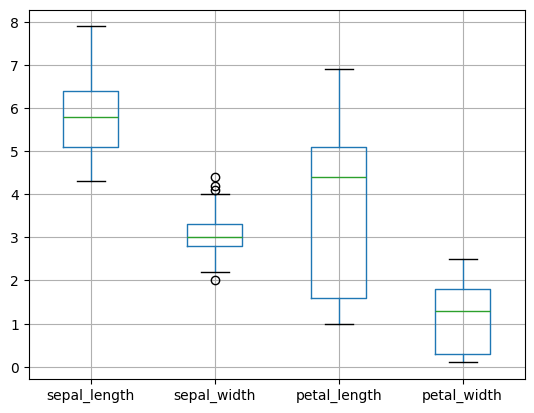

In [10]:
# Plotting quick boxplots to visualize outliers.
numeric_df.boxplot(column=numeric_df.columns.tolist())
plt.show()

In [11]:
# We have detected some outliers in the dataset. Let's see which they are.
outlier_indices = {}
for column in numeric_df.columns:
    outlier_indices[column] = numeric_df[(numeric_df[column] < lower_bound[column]) | (numeric_df[column] > upper_bound[column])].index.tolist()
outlier_indices

{'sepal_length': [],
 'sepal_width': [15, 32, 33, 60],
 'petal_length': [],
 'petal_width': []}

In [12]:
outlier_indices = [15, 32, 33, 60]
df.loc[outlier_indices]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


In [13]:
# Getting rid of outliers and confirming they are removed.
df = df.drop(index=outlier_indices)
numeric_df = df.select_dtypes(include=['float64'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR    
upper_bound = Q3 + 1.5 * IQR
outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).sum()
outliers

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

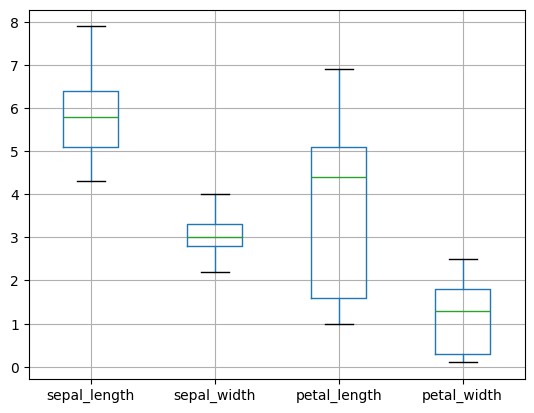

In [14]:
# Final boxplots after removing outliers .
numeric_df.boxplot(column=numeric_df.columns.tolist())
plt.show()


In [15]:
# Converting species since they are in text into numerical format using label encoding.
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
# Associating the encoded values with their respective species names for clarity purposes.
dict(zip(le.classes_, le.transform(le.classes_)))


{'setosa': np.int64(0), 'versicolor': np.int64(1), 'virginica': np.int64(2)}

In [18]:
# Checking the distribution of the target variable after encoding.
df['species'].value_counts().sort_index()

species
0    45
1    49
2    49
Name: count, dtype: int64

In [19]:
# Summary statistics of data before standardization.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.870629,3.038462,3.830769,1.230769,1.027972
std,0.835045,0.398222,1.750824,0.754538,0.813132
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.000000,6.900000,2.500000,2.000000


In [20]:
# Standardizing the numeric features only and not the target variable 'species'.
scaler = StandardScaler()
df[numeric_df.columns] = scaler.fit_transform(df[numeric_df.columns])

# Summary statistics of data after standardization.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,143.000000
mean,-2.484415e-16,3.229740e-16,1.987532e-16,-3.478181e-16,1.027972
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,0.813132
min,-1.887503e+00,-2.112914e+00,-1.622504e+00,-1.503891e+00,0.000000
25%,-9.261034e-01,-6.009205e-01,-1.278604e+00,-1.237897e+00,0.000000
50%,-8.487880e-02,-9.692266e-02,3.262644e-01,9.207498e-02,1.000000
75%,6.361708e-01,6.590741e-01,7.274815e-01,7.570609e-01,2.000000
max,2.438795e+00,2.423066e+00,1.759183e+00,1.688041e+00,2.000000


In [ ]:
# Reviewing the final cleaned dataset which is now ready for further analysis and modelling.
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.926103,1.163072,-1.393237,-1.370894,0
1,-1.166453,-0.096923,-1.393237,-1.370894,0
2,-1.406803,0.407075,-1.450554,-1.370894,0
3,-1.526978,0.155076,-1.335921,-1.370894,0
4,-1.046278,1.415071,-1.393237,-1.370894,0
...,...,...,...,...,...
145,0.996696,-0.096923,0.784798,1.422047,2
146,0.515996,-1.356917,0.670165,0.890058,2
147,0.756346,-0.096923,0.784798,1.023055,2
148,0.395821,0.911073,0.899432,1.422047,2
